# Importing Libraries

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile 
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Downloading Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!wget --no-check-certificate \
    "https://github.com/laxmimerit/dog-cat-full-dataset/archive/refs/heads/master.zip" \
    -O "/tmp/cats-and-dogs.zip"


zip_ref = zipfile.ZipFile('/tmp/cats-and-dogs.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/tmp') # Extracts the files into the /tmp folder
zip_ref.close()


--2022-07-18 17:16:30--  https://github.com/laxmimerit/dog-cat-full-dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/laxmimerit/dog-cat-full-dataset/zip/refs/heads/master [following]
--2022-07-18 17:16:30--  https://codeload.github.com/laxmimerit/dog-cat-full-dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs.     [         <=>        ] 545.70M  21.5MB/s    in 19s     

2022-07-18 17:16:50 (28.1 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [572212372]



# Preparing the Dataset

In [ ]:
# 5k test, 20k train images

PATH_TRAIN = "/tmp/dog-cat-full-dataset-master/data/train"
PATH_VALID = None
PATH_TEST = "/tmp/dog-cat-full-dataset-master/data/test"

In [ ]:
image_size = (256, 256)
batch_size = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    PATH_TRAIN,
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 20000 files belonging to 2 classes.
Using 14000 files for training.


In [ ]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    PATH_TRAIN,
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 20000 files belonging to 2 classes.
Using 6000 files for validation.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    PATH_TEST,
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5000 files belonging to 2 classes.


In [ ]:
test_ds.take(2)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 1)


# Creating and Training the Model

In [ ]:
number_of_color_channels = 3

IMG_SHAPE = list(image_size)
IMG_SHAPE.append(number_of_color_channels)
IMG_SHAPE = tuple(IMG_SHAPE)

print(IMG_SHAPE)

(256, 256, 3)


In [ ]:
Epochs = 30

In [ ]:
xtime = time.time()

#save model accuracy history graph by using tensorboard
#tensorboard = TensorBoard(log_dir=f"gdrive/MyDrive/.../DL-2 Cats and Dogs/Callbacks/tensorboard time={xtime}")

cat_dog_model = Sequential([
    keras.Input(IMG_SHAPE),
    tf.keras.layers.Rescaling(1./255)
])

cat_dog_model.add(Conv2D(64, (3,3), activation="relu"))
cat_dog_model.add(MaxPooling2D(pool_size=(2, 2)))
cat_dog_model.add(Dropout(0.33))

cat_dog_model.add(Conv2D(64, (3,3), activation="relu"))
cat_dog_model.add(MaxPooling2D(pool_size=(2, 2)))
cat_dog_model.add(Dropout(0.33))



cat_dog_model.add(Flatten())

cat_dog_model.add(Dense(64, activation="relu"))
cat_dog_model.add(Dropout(0.5))
cat_dog_model.add(Dense(1, activation="sigmoid")) # 2 classes,0 or 1, binary


cat_dog_model.compile(loss="binary_crossentropy",
                                  optimizer="Adam",
                                  metrics=["accuracy"])

cat_dog_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 127, 127, 64)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [ ]:
history = cat_dog_model.fit(train_ds, epochs=Epochs, validation_data=valid_ds) #callbacks=[tensorboard])

Epoch 1/30
438/438 [==============================] - 71s 130ms/step - loss: 0.7938 - accuracy: 0.5461 - val_loss: 0.6833 - val_accuracy: 0.5842
Epoch 2/30
438/438 [==============================] - 58s 131ms/step - loss: 0.6713 - accuracy: 0.5819 - val_loss: 0.6435 - val_accuracy: 0.6315
Epoch 3/30
438/438 [==============================] - 59s 133ms/step - loss: 0.6240 - accuracy: 0.6605 - val_loss: 0.6022 - val_accuracy: 0.6865
Epoch 4/30
438/438 [==============================] - 57s 130ms/step - loss: 0.5490 - accuracy: 0.7223 - val_loss: 0.5934 - val_accuracy: 0.6912
Epoch 5/30
438/438 [==============================] - 57s 130ms/step - loss: 0.4762 - accuracy: 0.7774 - val_loss: 0.5964 - val_accuracy: 0.7110
Epoch 6/30
438/438 [==============================] - 57s 130ms/step - loss: 0.3981 - accuracy: 0.8151 - val_loss: 0.6364 - val_accuracy: 0.7140
Epoch 7/30
438/438 [==============================] - 57s 130ms/step - loss: 0.3182 - accuracy: 0.8610 - val_loss: 0.6073 - val_ac

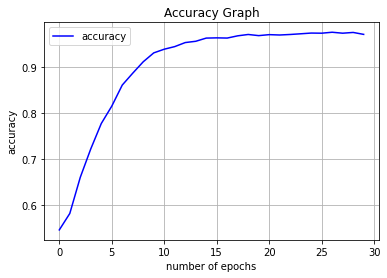

In [ ]:
plt.plot(history.history["accuracy"],color="b",label="accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

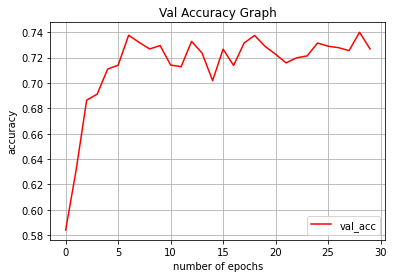

In [ ]:
plt.plot(history.history["val_accuracy"],color="r",label="val_acc")
plt.title("Val Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

In [ ]:
cat_dog_model.evaluate(test_ds)

157/157 [==============================] - 10s 60ms/step - loss: 1.1386 - accuracy: 0.7302


[1.1386315822601318, 0.7301999926567078]

In [ ]:
cat2 = plt.imread("/tmp/cat2.jpg")
cat2 = np.expand_dims(cat2, axis=0)
#print(cat2.shape)

cat2_pred = cat_dog_model.predict(cat2)
print("cat2 class is:", np.around(cat2_pred))

###################################
###################################

dog1 = plt.imread("/tmp/dog1.jpg")
dog1 = np.expand_dims(dog1, axis=0)
#print(dog1.shape)

dog1_pred = cat_dog_model.predict(dog1)
print("dog1 class is:", np.around(dog1_pred))


cat2 class is: [[0.]]
dog1 class is: [[1.]]


y_pred_rounded shape: (32, 1)
y_true shape: (32, 1)


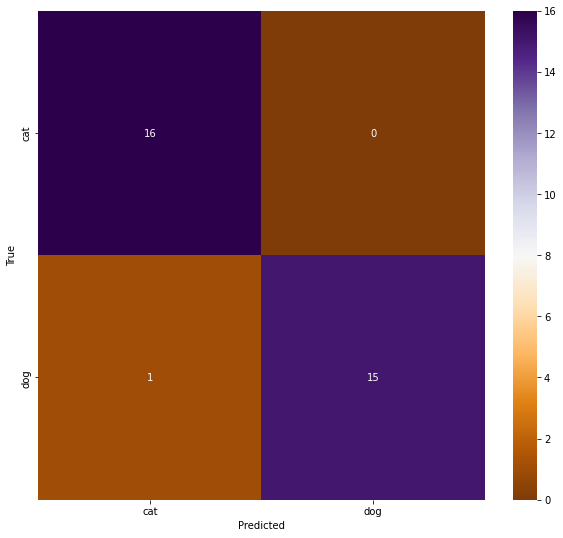

In [ ]:
#confusion matrix

for images, labels in train_ds.take(1): # first batch, 32 images and labels but considered only 1 loop
  y_pred = cat_dog_model.predict(images)
  y_true = labels

y_pred = y_pred.reshape(batch_size, 1)
y_pred_rounded = np.around(y_pred)


print("y_pred_rounded shape:", y_pred_rounded.shape)
print("y_true shape:", y_true.shape)


conf_mat = confusion_matrix(y_true, y_pred_rounded)

f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="PuOr")

animal_names = ["cat", "dog"]

ax.set_xticklabels(animal_names)
ax.set_yticklabels(animal_names)

plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()
